In [1]:
!wget https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=0

--2024-12-11 13:13:07--  https://www.dropbox.com/s/w3zlhing4dkgeyb/train.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/qtcrzmsv4jz47cgvr2t0u/train.zip?rlkey=x3sz1h2o797inkqer67q7dg6b&dl=0 [following]
--2024-12-11 13:13:07--  https://www.dropbox.com/scl/fi/qtcrzmsv4jz47cgvr2t0u/train.zip?rlkey=x3sz1h2o797inkqer67q7dg6b&dl=0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc10238f05f091d23ecdbc210520.dl.dropboxusercontent.com/cd/0/inline/CgCLKPqi7-DrFQaWIkrMFpJPIDkiEdy6s-PU3Nw16XBaBNVQN5IFR2Dvo67F2YMUKIYPUF_t_oRg47UyWcY5lCN9Eoe2Kg_EgHJCNDabH1D94tV5B7spiIQspZmAZjHSqPSyqyG6yuXpH9gbaiuF0qDn/file# [following]
--2024-12-11 13:13:08--  https://uc10238f05f091d23ecdbc210520.dl.dropboxusercontent.com/cd/0/in

In [2]:
!unzip train.zip?dl=0

Archive:  train.zip?dl=0
  inflating: train/Happy/images (34).jpg  
  inflating: train/Happy/images (29).jpg  
  inflating: train/Neutral/images (39).jpg  
  inflating: train/Happy/images (19).jpg  
  inflating: train/Happy/images (22).jpg  
  inflating: train/Happy/images (32).jpg  
  inflating: train/Happy/images (27).jpg  
  inflating: train/Happy/images (33).jpg  
  inflating: train/Happy/images (28).jpg  
  inflating: train/Neutral/images (41).jpg  
  inflating: train/Happy/images (31).jpg  
  inflating: train/Happy/images (14).jpg  
  inflating: train/Happy/images (20).jpg  
  inflating: train/Happy/images (13).jpg  
  inflating: train/Happy/images (16).jpg  
  inflating: train/Neutral/images (42).jpg  
  inflating: train/Happy/images (21).jpg  
  inflating: train/Happy/images (24).jpg  
  inflating: train/Happy/images (35).jpg  
  inflating: train/Happy/images (18).jpg  
  inflating: train/Neutral/images (44).jpg  
  inflating: train/Happy/images (30).jpg  
  inflating: train/Ha

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.losses import categorical_crossentropy


In [4]:
base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,580,103 (13.66 MB)

 Trainable params: 351,239 (1.34 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

In [6]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

In [13]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preprocessing function to combine smoothing and sharpening
def preprocess_image(image):
    """Apply smoothing and sharpening to the image."""
    # Step 1: Smoothing (Gaussian Blur)
    image = cv2.GaussianBlur(image, (5, 5), 0)

    # Step 2: Sharpening
    sharpening_kernel = np.array([[0, -1, 0],
                                   [-1, 5, -1],
                                   [0, -1, 0]])
    image = cv2.filter2D(image, -1, sharpening_kernel)

    return image

# Custom Data Generator
class CustomDataGenerator(ImageDataGenerator):
    def standardize(self, x):
        """Override the standardize method to apply custom preprocessing."""
        x = preprocess_image(x)  # Apply smoothing and sharpening here
        return super().standardize(x)


In [14]:
train_datagen = CustomDataGenerator(
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    rescale=1.0 / 255,  # Rescaling to normalize pixel values
)

val_datagen = CustomDataGenerator(
    rescale=1.0 / 255,
)

In [15]:
train_data = train_datagen.flow_from_directory(
    directory="/content/train",  # Update to your training directory path
    target_size=(224, 224),      # Image size compatible with MobileNet
    batch_size=32,
)

val_data = val_datagen.flow_from_directory(
    directory="/content/train",    # Update to your validation directory path
    target_size=(224, 224),
    batch_size=32,
)


Found 350 images belonging to 7 classes.
Found 350 images belonging to 7 classes.


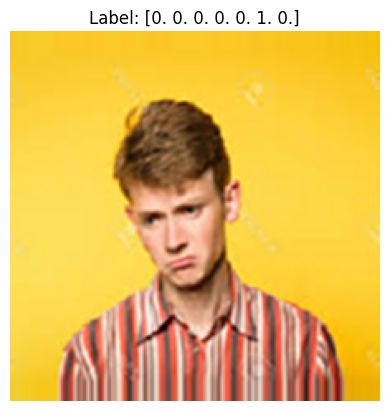

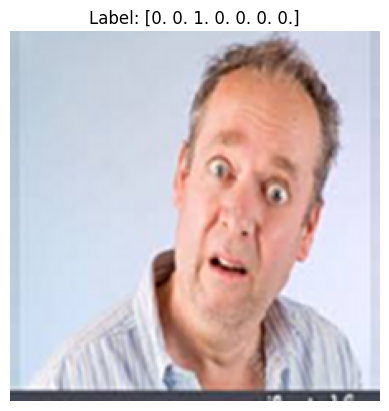

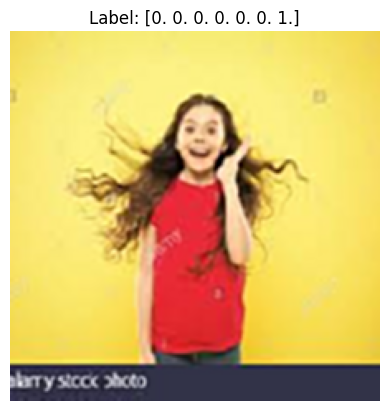

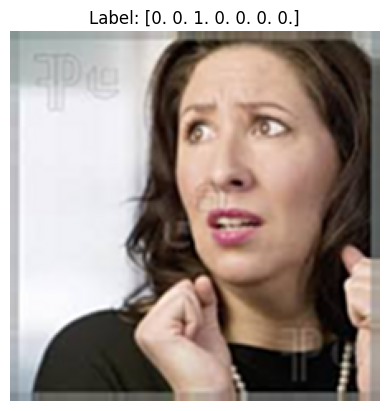

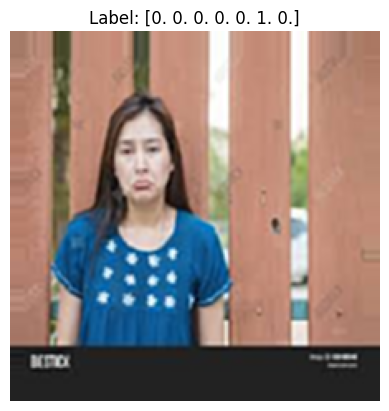

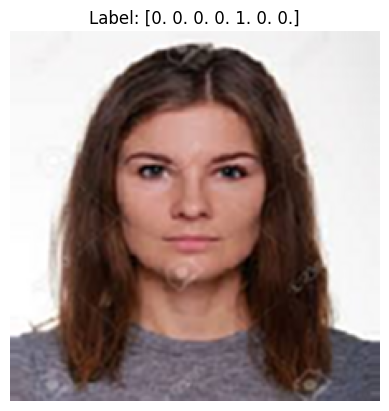

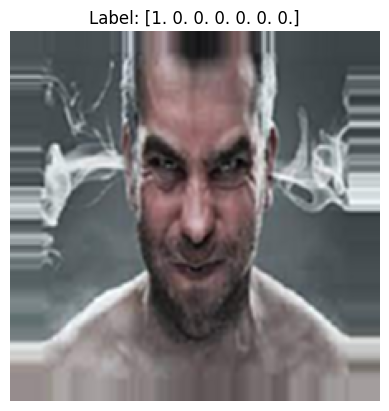

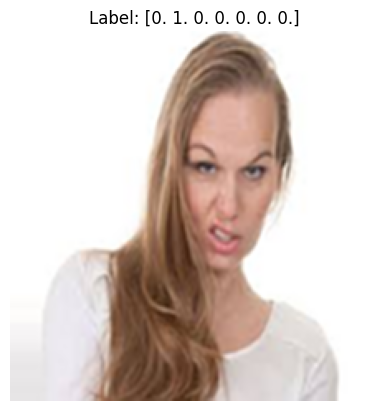

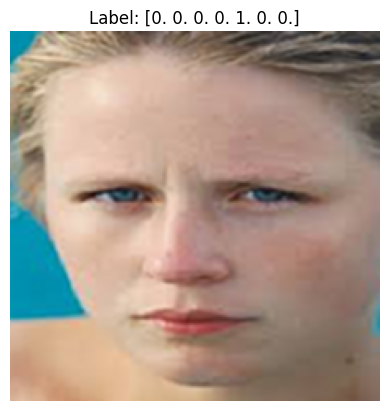

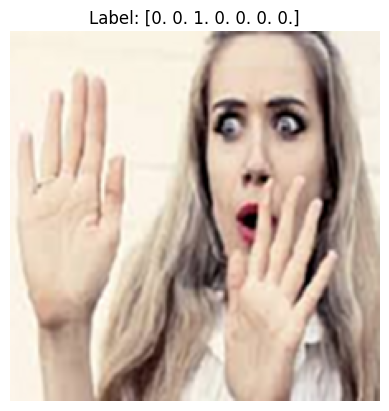

In [16]:
# Fetch a batch of preprocessed images and labels
t_img, label = next(train_data)

# Visualize the preprocessed images
def plot_images(img_arr, label):
    count = 0
    for im, l in zip(img_arr, label):
        plt.imshow(im)  # Assuming 'im' is in RGB format
        plt.title(f"Label: {l}")
        plt.axis('off')
        plt.show()
        count += 1
        if count == 10:  # Show only the first 10 images
            break

plot_images(t_img, label)

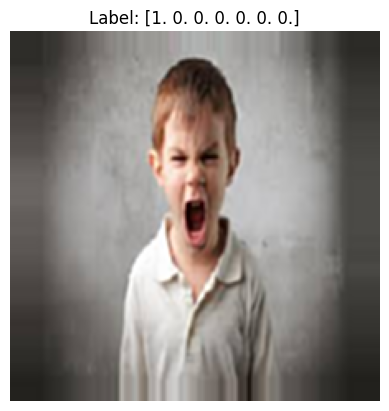

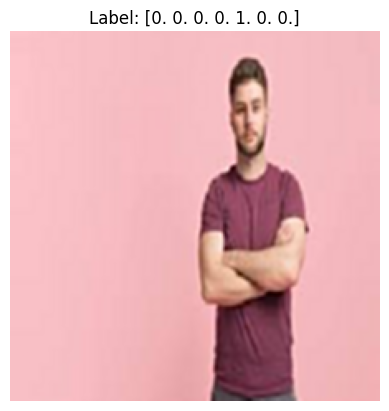

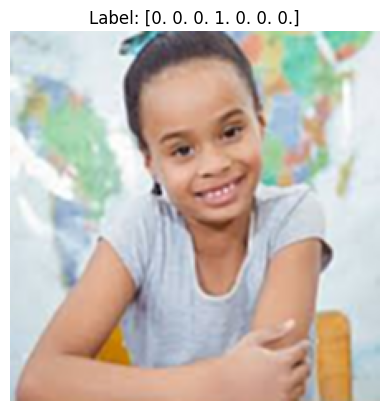

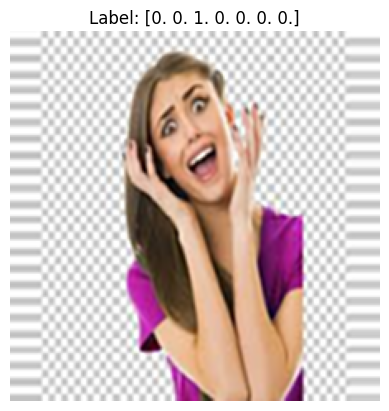

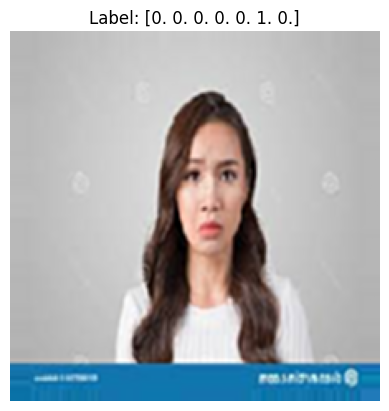

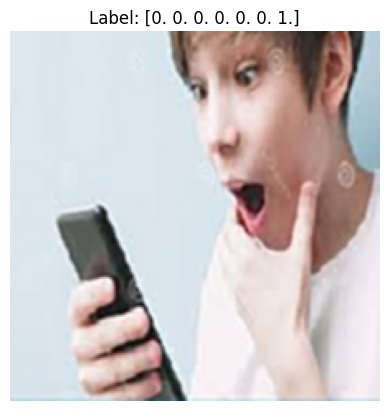

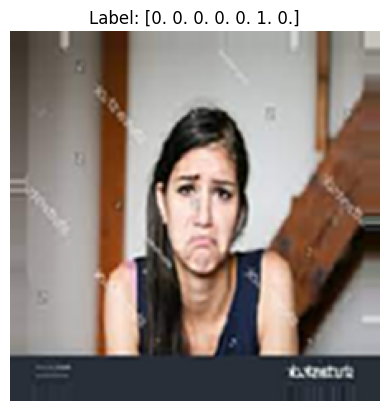

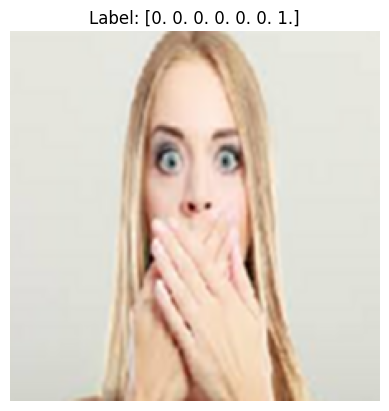

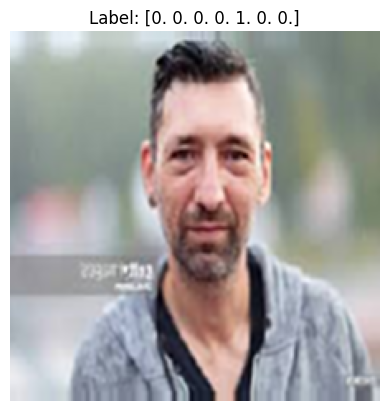

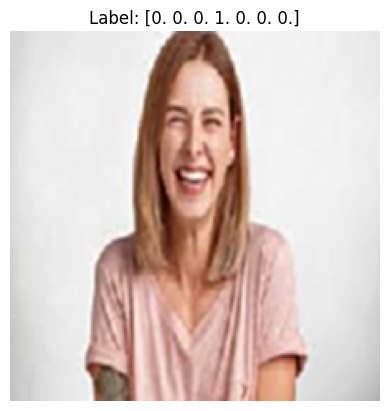

In [17]:
import matplotlib.pyplot as plt

# Function to plot images and their labels
def plotImages(img_arr, label):
    count = 0
    for im, l in zip(img_arr, label):
        plt.imshow(im)  # Assuming 'im' is in RGB format
        plt.title(f"Label: {l}")
        plt.axis('off')  # Turn off the axis for better visualization
        plt.show()

        count += 1
        if count == 10:  # Plot only the first 10 images
            break

# Get a batch of images and labels using the next() function
t_img, label = next(train_data)

# Plot the images
plotImages(t_img, label)


In [18]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# EarlyStopping callback
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=5, verbose=1, mode='auto')

# ModelCheckpoint callback (with .keras extension)
mc = ModelCheckpoint(filepath="best_model.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

# List of callbacks
call_back = [es, mc]


In [19]:
hist = model.fit(
    train_data,
    steps_per_epoch=10,
    epochs=30,
    validation_data=val_data,
    validation_steps=8,
    callbacks=[es, mc]
)


Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8904 - loss: 0.7204
Epoch 1: val_accuracy improved from -inf to 0.94141, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.8921 - loss: 0.7054 - val_accuracy: 0.9414 - val_loss: 0.3127
Epoch 2/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.8750 - loss: 0.9135
Epoch 2: val_accuracy did not improve from 0.94141
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 596ms/step - accuracy: 0.8750 - loss: 0.9135 - val_accuracy: 0.8830 - val_loss: 0.5619
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9097 - loss: 0.2829
Epoch 3: val_accuracy improved from 0.94141 to 0.99219, saving model to best_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.9099 - loss: 0.2816 - val_accuracy: 0.9922 - val_loss: 0.0447
Epoch 4/30
 1/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9688 - loss: 0.1271
Epoch 4: val_accuracy improved from 0.99219 to 1.00000, saving model to best_model.keras
10/1

In [20]:
from keras.models import load_model
model = load_model("/content/best_model.keras")

In [21]:
h =  hist.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

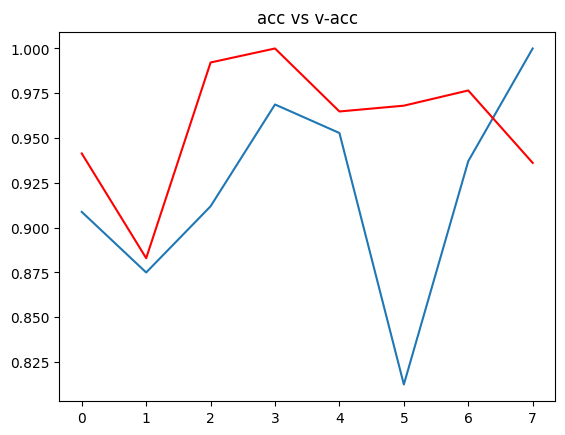

In [22]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

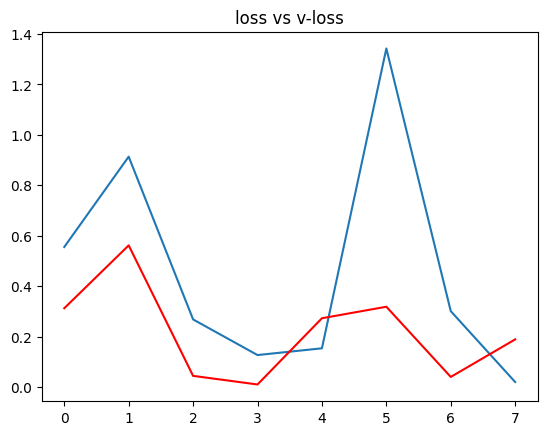

In [23]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [24]:
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 644ms/step
 the image is of Happy


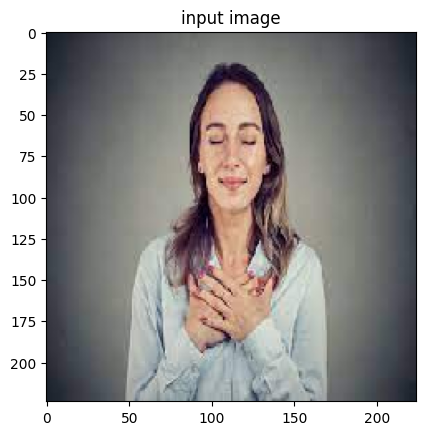

In [25]:
path = "/content/download.jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
 the image is of Angry


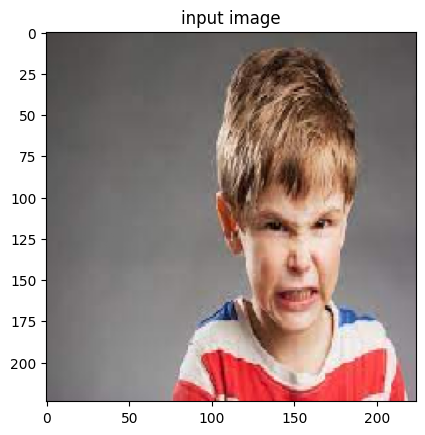

In [26]:
path = "/content/download (1).jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
 the image is of Disguist


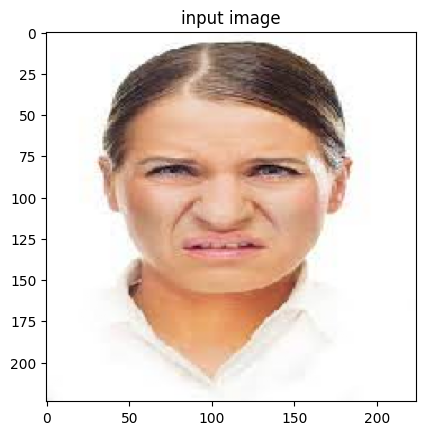

In [27]:
path = "/content/download (2).jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
 the image is of Fear


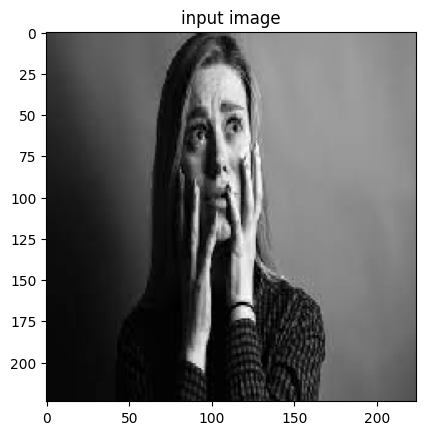

In [28]:
path = "/content/download (10).jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
 the image is of Neutral


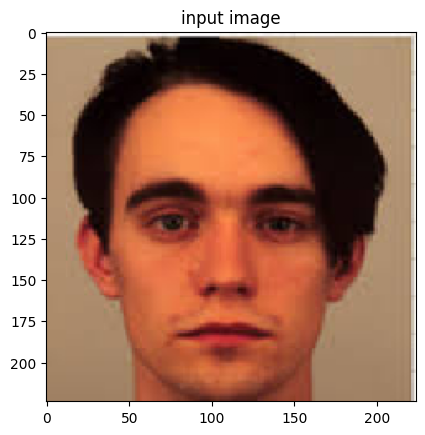

In [29]:
path = "/content/images (20).jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
 the image is of Sad


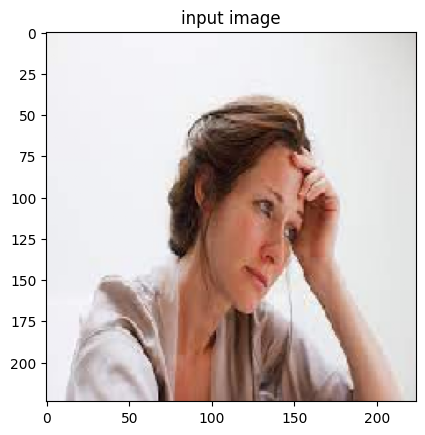

In [30]:
path = "/content/download (16).jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
 the image is of Surprise


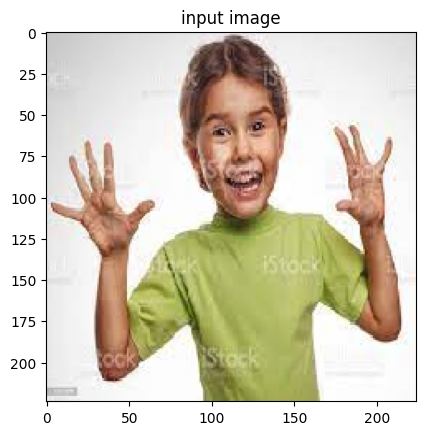

In [31]:
path = "/content/download (15).jpg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()


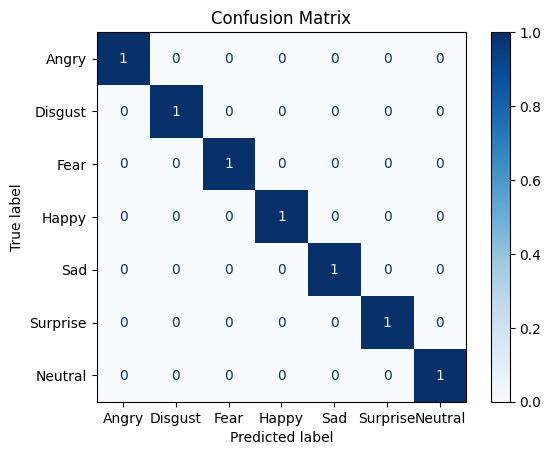

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Example: Replace these with your actual test data labels
true_labels = [0, 1, 2, 3, 4, 5, 6]  # True labels
predicted_labels = [0, 1, 2, 3, 4, 5, 6]  # Replace with your model's predictions

# Calculate metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Output metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
